In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [9]:
# Load NASDAQ 100 data
nasdaq100_data = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/datasets/nasdaq100.pkl')

# Extract relevant features for each company
features_df = pd.DataFrame()

In [10]:
# Loop through each company
for company in nasdaq100_data.columns.levels[0]:
    company_data = nasdaq100_data[company]

    # Calculate daily returns, volatility, and average return for each company
    daily_returns = company_data['Adj Close'].pct_change()
    volatility = daily_returns.rolling(window=20).std()
    average_return = daily_returns.rolling(window=20).mean()

    # Create a DataFrame with selected features for each company
    company_features = pd.DataFrame({
        f'{company}_Volatility': volatility,
        f'{company}_AverageReturn': average_return
    })

    features_df = pd.concat([features_df, company_features], axis=1)

features_df = features_df['2010':'2020']
features_df

,AAPL_Volatility,AAPL_AverageReturn,ABNB_Volatility,ABNB_AverageReturn,ADBE_Volatility,ADBE_AverageReturn,ADI_Volatility,ADI_AverageReturn,ADP_Volatility,ADP_AverageReturn,...,WBA_Volatility,WBA_AverageReturn,WBD_Volatility,WBD_AverageReturn,WDAY_Volatility,WDAY_AverageReturn,XEL_Volatility,XEL_AverageReturn,ZS_Volatility,ZS_AverageReturn
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0.017053,0.004419,NaN,NaN,0.013439,0.001577,0.007235,0.001647,0.007713,0.000007,...,0.013368,-0.000581,0.011084,-0.000868,NaN,NaN,0.008068,0.001362,NaN,NaN
2010-01-05,0.016378,0.005310,NaN,NaN,0.013574,0.001705,0.007225,0.001666,0.007295,-0.000841,...,0.013459,-0.001062,0.014176,0.001416,NaN,NaN,0.008435,0.001083,NaN,NaN
2010-01-06,0.015836,0.005645,NaN,NaN,0.013548,0.001777,0.007095,0.001832,0.007197,-0.001176,...,0.013514,-0.001203,0.014493,0.002033,NaN,NaN,0.008246,0.000742,NaN,NaN
2010-01-07,0.015924,0.005309,NaN,NaN,0.014207,0.001206,0.007144,0.001797,0.005744,-0.000219,...,0.013141,-0.000107,0.014055,0.002670,NaN,NaN,0.008320,0.000551,NaN,NaN
2010-01-08,0.013435,0.003553,NaN,NaN,0.014181,0.001253,0.007010,0.001638,0.005284,-0.000758,...,0.010932,-0.001590,0.013702,0.003355,NaN,NaN,0.008192,0.000238,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.016705,0.006588,NaN,NaN,0.011806,0.003142,0.012805,0.003343,0.008840,0.001013,...,0.023596,0.000958,0.017807,0.002426,0.025019,0.007640,0.011768,-0.002224,0.063156,0.018522
2020-12-28,0.017922,0.008135,NaN,NaN,0.011525,0.002312,0.012595,0.002754,0.008737,0.000691,...,0.023588,0.001098,0.018895,0.003637,0.024837,0.004176,0.012045,-0.001330,0.064033,0.016132
2020-12-29,0.018261,0.006414,NaN,NaN,0.011559,0.002478,0.012667,0.001919,0.008853,0.000589,...,0.022834,0.002052,0.018017,0.005081,0.025300,0.003100,0.012046,-0.001062,0.063982,0.013741


In [11]:
features_df.isna().sum()

AAPL_Volatility          0
AAPL_AverageReturn       0
ABNB_Volatility       2769
ABNB_AverageReturn    2769
ADBE_Volatility          0
                      ... 
WDAY_AverageReturn     721
XEL_Volatility           0
XEL_AverageReturn        0
ZS_Volatility         2084
ZS_AverageReturn      2084
Length: 202, dtype: int64

In [13]:
# For now, removing the columns with NaN but later fill the columns using imputations
features_df = features_df.dropna(axis=1)
features_df

,AAPL_Volatility,AAPL_AverageReturn,ADBE_Volatility,ADBE_AverageReturn,ADI_Volatility,ADI_AverageReturn,ADP_Volatility,ADP_AverageReturn,ADSK_Volatility,ADSK_AverageReturn,...,VRSK_Volatility,VRSK_AverageReturn,VRTX_Volatility,VRTX_AverageReturn,WBA_Volatility,WBA_AverageReturn,WBD_Volatility,WBD_AverageReturn,XEL_Volatility,XEL_AverageReturn
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0.017053,0.004419,0.013439,0.001577,0.007235,0.001647,0.007713,0.000007,0.018346,0.003716,...,0.012847,0.003786,0.016888,0.004910,0.013368,-0.000581,0.011084,-0.000868,0.008068,0.001362
2010-01-05,0.016378,0.005310,0.013574,0.001705,0.007225,0.001666,0.007295,-0.000841,0.016219,0.000782,...,0.011810,0.002841,0.018434,0.003993,0.013459,-0.001062,0.014176,0.001416,0.008435,0.001083
2010-01-06,0.015836,0.005645,0.013548,0.001777,0.007095,0.001832,0.007197,-0.001176,0.016049,0.001361,...,0.011893,0.002944,0.018764,0.003672,0.013514,-0.001203,0.014493,0.002033,0.008246,0.000742
2010-01-07,0.015924,0.005309,0.014207,0.001206,0.007144,0.001797,0.005744,-0.000219,0.015887,0.002082,...,0.011815,0.003088,0.018862,0.002238,0.013141,-0.000107,0.014055,0.002670,0.008320,0.000551
2010-01-08,0.013435,0.003553,0.014181,0.001253,0.007010,0.001638,0.005284,-0.000758,0.015085,0.005164,...,0.012339,0.002377,0.019420,0.000785,0.010932,-0.001590,0.013702,0.003355,0.008192,0.000238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.016705,0.006588,0.011806,0.003142,0.012805,0.003343,0.008840,0.001013,0.013673,0.005372,...,0.011222,0.001544,0.013679,0.003711,0.023596,0.000958,0.017807,0.002426,0.011768,-0.002224
2020-12-28,0.017922,0.008135,0.011525,0.002312,0.012595,0.002754,0.008737,0.000691,0.013897,0.004794,...,0.013093,0.002554,0.011025,0.001313,0.023588,0.001098,0.018895,0.003637,0.012045,-0.001330
2020-12-29,0.018261,0.006414,0.011559,0.002478,0.012667,0.001919,0.008853,0.000589,0.013006,0.003177,...,0.013441,0.001979,0.011022,0.001303,0.022834,0.002052,0.018017,0.005081,0.012046,-0.001062


In [15]:
features_df.isna().sum().sum()

0

In [16]:
# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)
scaled_features

array([[ 0.11167156,  0.83426035, -0.41673645, ..., -0.30184248,
        -0.3613883 ,  0.34705753],
       [ 0.02143106,  1.06912799, -0.40164872, ...,  0.23772926,
        -0.30165404,  0.21619225],
       [-0.05090854,  1.15745787, -0.40451467, ...,  0.38355951,
        -0.33246431,  0.05711716],
       ...,
       [ 0.27304368,  1.36028492, -0.62717729, ...,  1.10352785,
         0.2858263 , -0.78637284],
       [ 0.18474751,  0.84136432, -0.59411325, ...,  0.81333229,
         0.18980531, -1.06859905],
       [ 0.21248472,  0.70111811, -0.59271631, ...,  0.62986613,
         0.28375151, -0.79763246]])

In [17]:
# Autoencoder architecture
input_dim = scaled_features.shape[1]
encoding_dim = 2  # Set the desired dimensionality of the embeddings

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(input_dim,)),
    tf.keras.layers.Dense(encoding_dim, activation='relu'),
    tf.keras.layers.Dense(input_dim, activation='sigmoid')
])

model.compile(optimizer='adam', loss='mse')

In [19]:
# Train the autoencoder
model.fit(scaled_features, scaled_features, epochs=50, batch_size=32, shuffle=True)

Epoch 1/50
87/87 [==============================] - 1s 2ms/step - loss: 1.2237
Epoch 2/50
87/87 [==============================] - 0s 1ms/step - loss: 1.0809
Epoch 3/50
87/87 [==============================] - 0s 2ms/step - loss: 0.9823
Epoch 4/50
87/87 [==============================] - 0s 1ms/step - loss: 0.9487
Epoch 5/50
87/87 [==============================] - 0s 2ms/step - loss: 0.9319
Epoch 6/50
87/87 [==============================] - 0s 2ms/step - loss: 0.9189
Epoch 7/50
87/87 [==============================] - 0s 2ms/step - loss: 0.9079
Epoch 8/50
87/87 [==============================] - 0s 2ms/step - loss: 0.8994
Epoch 9/50
87/87 [==============================] - 0s 2ms/step - loss: 0.8910
Epoch 10/50
87/87 [==============================] - 0s 2ms/step - loss: 0.8840
Epoch 11/50
87/87 [==============================] - 0s 2ms/step - loss: 0.8791
Epoch 12/50
87/87 [==============================] - 0s 2ms/step - loss: 0.8766
Epoch 13/50
87/87 [==============================

In [20]:
# Extract embeddings using the encoder
encoder = tf.keras.Model(inputs=model.input, outputs=model.layers[1].output)
embeddings = encoder.predict(scaled_features)

87/87 [==============================] - 0s 1ms/step


In [22]:
# Apply K-means clustering to the embeddings
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
Clusters = kmeans.fit_predict(embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


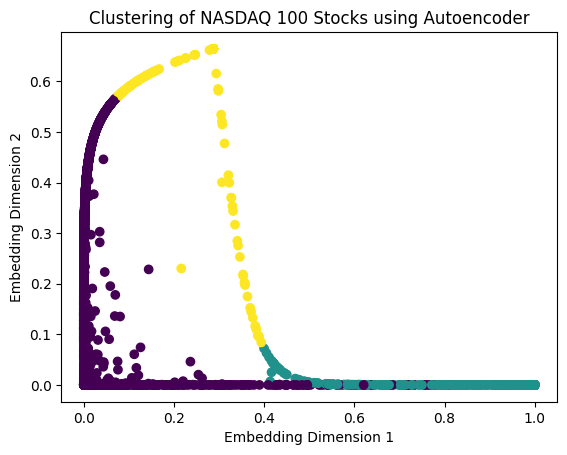

In [23]:
# Visualize clusters
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=Clusters, cmap='viridis', )
plt.xlabel('Embedding Dimension 1')
plt.ylabel('Embedding Dimension 2')
plt.title('Clustering of NASDAQ 100 Stocks using Autoencoder')
plt.show()
